# Data Cleaning

First pass reduces 10,000 variables to 123

Second pass (PCA) reduces 123 variables to 55

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(28)

data = pd.read_csv("dorothea_smaller.csv")

In [2]:
data_out = pd.DataFrame(data['y.train'])
data_in = data.drop(columns = ['y.train','Unnamed: 0'])

In [3]:
l_bound = 0.05  #If data varies in less than 5% of cases, it is deemed not significant
u_bound = 1 - l_bound
data_cut = data_in

In [35]:
for i in range(len(data_in.columns)):  #Note: this loop takes approx. 9 mins to run (for my crappy laptop)
    if sum(data_in.iloc[:,i]) <= (l_bound * len(data_in)):
        data_cut = data_cut.drop(data_in.columns[i], axis=1)
    elif sum(data_in.iloc[:,i]) >= (u_bound * len(data_in)):
        data_cut = data_cut.drop(data_in.columns[i], axis=1)

data_cut.to_csv('data_cut.csv')

print("Variables: " + str(len(data_cut.columns)))

Variables: 123


In [5]:
data_mod = pd.read_csv("data_cut.csv")
#df.insert(124,"Output",data_out,True)
data_mod = data_mod.drop(columns = ['Unnamed: 0'])

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [42]:
n_PCA = 0 #Number of Principal Components
sum_var = 0 #Variance retained by reduced number of components
var_tgt = 0.6 #Target retained variance
x=StandardScaler().fit_transform(data_mod.values)

for j in range(1, len(data_mod.columns) - 1):
    if sum_var < var_tgt:
        n_PCA = j
        data_pca = decomposition.PCA(n_components = n_PCA)
        principalComponents = data_pca.fit_transform(x)
        var = data_pca.explained_variance_ratio_
        sum_var += var[j - 1]
        print("No. Components: " + str(n_PCA) +
              "   Retained Variance: " + str(round(sum_var, 3)))

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


No. Components: 1   Retained Variance: 0.026
No. Components: 2   Retained Variance: 0.044
No. Components: 3   Retained Variance: 0.06
No. Components: 4   Retained Variance: 0.074
No. Components: 5   Retained Variance: 0.088
No. Components: 6   Retained Variance: 0.102
No. Components: 7   Retained Variance: 0.116
No. Components: 8   Retained Variance: 0.129
No. Components: 9   Retained Variance: 0.143
No. Components: 10   Retained Variance: 0.156
No. Components: 11   Retained Variance: 0.169
No. Components: 12   Retained Variance: 0.181
No. Components: 13   Retained Variance: 0.193
No. Components: 14   Retained Variance: 0.205
No. Components: 15   Retained Variance: 0.217
No. Components: 16   Retained Variance: 0.229
No. Components: 17   Retained Variance: 0.24
No. Components: 18   Retained Variance: 0.252
No. Components: 19   Retained Variance: 0.263
No. Components: 20   Retained Variance: 0.274
No. Components: 21   Retained Variance: 0.285
No. Components: 22   Retained Variance: 0.296

In [45]:
data_pca.components_

array([[-0.03358772,  0.00374976, -0.01482861, ..., -0.01855764,
        -0.02634882,  0.00456956],
       [ 0.04973107, -0.0741148 , -0.00078014, ...,  0.00753073,
        -0.08262797, -0.01787576],
       [-0.08145259, -0.1302719 ,  0.0290825 , ...,  0.06317665,
        -0.02996765,  0.05882819],
       ...,
       [-0.19850416, -0.11380019, -0.04933964, ...,  0.09255037,
         0.11284017,  0.07481217],
       [-0.06225927,  0.0563224 , -0.13362769, ...,  0.17418487,
         0.03961387, -0.01380502],
       [ 0.04209748, -0.01786639, -0.07528103, ...,  0.12430808,
        -0.05613514,  0.08748138]])

In [43]:
principalDf = pd.DataFrame(data = principalComponents)

In [44]:
principalDf #Rows = Data input row; total no.rows = 800
#Columns = Each variable value (i.e. 0 or 1) multiplied by that variable's PCA coefficient
#One column for each set of PCA coefficients; total no. columns = n_PCA

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.385959,-0.778996,-0.152616,-1.410385,-1.844511,1.345306,1.281386,0.034272,-0.090068,1.824264,...,0.606706,-1.637276,0.718283,-0.406662,1.217704,0.555491,-0.702972,0.947031,-1.642545,-0.114734
1,-0.593489,0.532979,-0.523250,0.382807,1.602375,3.011969,-4.814086,0.045705,-1.463692,-0.745320,...,-2.630778,-1.394947,-1.376370,0.216724,0.098467,-1.439870,0.462671,0.106497,0.139706,0.164029
2,-0.529814,-0.443028,-1.347689,-1.319175,1.247703,1.112770,1.770699,-1.189973,-0.582721,-0.110211,...,2.840179,-0.285129,-0.738774,0.844194,-1.229110,-1.017012,0.231424,-0.043295,-0.547507,1.208395
3,-0.308405,-0.547616,-1.239576,0.195134,0.411923,1.218983,1.564833,0.337241,0.143945,1.341829,...,0.790708,-0.183480,-0.098277,0.554049,1.141224,-1.072111,-0.819072,-0.562156,1.343548,-0.041640
4,-0.553507,-0.951415,-0.177123,-0.700697,0.332675,-0.535213,-0.714952,0.227068,0.513343,2.354986,...,0.787585,-0.259892,-1.827559,1.117298,-0.663638,0.473597,2.017457,0.710608,-1.421349,-1.594333
5,-1.404544,-1.669430,2.060024,-1.428814,-1.145581,-0.524947,0.338428,1.100526,-0.427755,0.466917,...,0.603287,0.698903,-0.808010,0.875450,0.935393,-1.678860,-1.195290,-0.788811,0.035064,0.683543
6,-0.566367,0.013276,-0.567762,0.865326,1.587987,-0.366474,0.589911,-1.475340,-1.712248,2.648752,...,0.334897,0.323335,-0.745839,1.072948,-0.445754,-0.320001,-0.164834,0.138636,0.667444,-0.769922
7,-0.598095,-0.628415,-2.402673,0.869019,4.572390,-2.870515,-0.541063,0.469533,-1.293205,0.227673,...,-0.871003,1.602543,-0.536797,-0.893648,0.215776,-0.162999,-2.000897,-1.520414,-0.183637,-0.034611
8,-0.729730,-0.476116,0.458340,0.676263,0.228912,-0.743288,0.140597,-0.890256,-1.309487,0.643243,...,-1.057559,0.501971,-0.781480,0.365198,-1.094243,-0.426260,-0.071402,-0.688754,-0.043829,-0.750375
9,0.124608,-0.767730,-0.849190,-1.214801,-0.615190,0.454193,0.795526,-1.155029,1.073296,-2.557242,...,1.090849,2.311267,1.648928,0.634551,0.053175,0.354898,-0.337868,-1.160795,0.486310,0.686673


# Clustering

Currently not functioning

Aim is to fit the 55 variables to 2 clusters, and compare the distribution of active/inactive samples between these 2 clusters

In [47]:
from sklearn import cluster

In [49]:
kmeans= cluster.KMeans(n_clusters = 2)
kmeans.fit(principalDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
#These can be used to generate scatter plots of the clustering
#This may determine which PCA variable/s is/are the most important in predicting drug activity

#clust1=np.where(kmeans.labels_==0)
#clust2=np.where(kmeans.labels_==1)

In [65]:
clust = kmeans.labels_

In [ ]:
#  !! ERROR IN THIS SECTION !!

#'activity' is a numpy array of same size as 'clust', but cannot be compared
#Need to remove square brackets from values in 'activity'

activity = data_out.values
pd.crosstab(clust,activity)

# Neural Network

Machine learning to predict drug classification (active/inactive) with >90% accuracy

In [110]:
from sklearn.model_selection import train_test_split

In [25]:
inputs = data_mod.to_numpy()

In [26]:
data_out_mod1 = (data_out + 1) / 2 #Inactive = 0, Active = 1
data_out_mod2 = 0.5 - (data_out / 2) #Inactive = 1, Active = 0
outputs = np.concatenate((data_out_mod1,data_out_mod2),axis=1)

In [27]:
train_x, test_x, train_y, test_y = train_test_split(inputs, outputs, test_size=0.25, random_state=28)

In [58]:
def sigmoid(x):
    # This is not strictly sigmoid, but more stable when handling matrices
    return .5 * (1 + np.tanh(.5 * x))
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

learning_rate = 0.001
num_epochs = 5000

# Network architecture parameters
num_features = len(train_x[0])
num_classes = len(train_y[0])
num_hidden_nodes = 8

# Initialise weights in the range -1 to 1
# Hidden layer weights with shape = number of input features x number of hidden nodes
hidden_weights = np.random.uniform(-1, 1, size=(num_features, num_hidden_nodes))
hidden_bias = np.random.uniform(-1, 1, size=(1, num_hidden_nodes))
# Output layer weights with shape = number of hidden nodes x number of output classes
output_weights = np.random.uniform(-1, 1, size=(num_hidden_nodes, num_classes))
output_bias = np.random.uniform(-1, 1, size=(1, num_classes))

# For recording error and accuracy - for graph later
training_errors = []
testing_errors = []
training_accuracies = []
testing_accuracies = []

# Train for number of epochs
for epoch in range(num_epochs):

    # Forward pass
    input_layer = train_x
    # sigmoid( (W * X) + b)
    hidden_layer = sigmoid(np.dot(input_layer, hidden_weights) + hidden_bias)
    output_layer = sigmoid(np.dot(hidden_layer, output_weights) + output_bias)

    # Backpropagation using gradient descent
    # Calculate output layer error
    output_layer_error = train_y - output_layer
    # Calculate output layer derivative Note: that we just need this layers error for the bias
    output_layer_delta = output_layer_error * sigmoid_deriv(output_layer)
    output_bias_delta = np.sum(output_layer_error, axis=0)
    
    # Calculate hidden layer error (from the output layers weights and derivative
    hidden_layer_error = output_layer_delta.dot(output_weights.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_deriv(hidden_layer)
    hidden_bias_delta = np.sum(hidden_layer_error, axis=0)

    # Update the weights (learning rate X layers input X layers derivative)
    output_weights += learning_rate * hidden_layer.T.dot(output_layer_delta)
    output_bias += learning_rate * output_bias_delta
    
    hidden_weights += learning_rate * input_layer.T.dot(hidden_layer_delta)
    hidden_bias += learning_rate * hidden_bias_delta

    # Every 100 epochs record error and accuracy during training
    if (epoch % 100) == 0:
        
        # Mean squared error over all errors this epoch
        error = 0.5 * np.mean(np.abs(output_layer_error)) ** 2
        training_errors.append(error)

        accuracy_count = 0
        for i in range(len(output_layer)):
          
            # Get the prediction i.e. the output with the highest value
            prediction = np.argmax(output_layer[i])
            # Get the actual label
            actual_label = np.argmax(train_y[i])
            
            # If they match the prediction was correct
            if prediction == actual_label:
                accuracy_count += 1
        accuracy = (100 / len(train_x)) * accuracy_count
        training_accuracies.append(accuracy)
        
        # Input test data to determine testing errors
        input_layer_test = test_x
        hidden_layer_test = sigmoid(np.dot(input_layer_test, hidden_weights) + hidden_bias)
        output_layer_test = sigmoid(np.dot(hidden_layer_test, output_weights) + output_bias)
        
        output_layer_error_test = test_y - output_layer_test
        error_test = 0.5 * np.mean(np.abs(output_layer_error_test)) ** 2
        testing_errors.append(error_test)
        
        accuracy_count_test = 0
        for i in range(len(output_layer_test)):
          
            prediction_test = np.argmax(output_layer_test[i])
            actual_label_test = np.argmax(test_y[i])
            
            if prediction_test == actual_label_test:
                accuracy_count_test += 1
        accuracy_test = (100 / len(test_x)) * accuracy_count_test
        testing_accuracies.append(accuracy_test)
        
        
#        print("Epoch: " + str(epoch) +
#              " Error: " + str(round(error, 5)) +
#              " Accuracy: " + str(round(accuracy, 3)) + "%" +
#              " T_Error: " + str(round(error_test, 5)) +
#              " T_Accuracy: " + str(round(accuracy_test, 3)) + "%")
                


Epoch: 0 Error: 0.19651 Accuracy: 9.833% T_Error: 0.1386 T_Accuracy: 36.5%
Epoch: 100 Error: 0.01472 Accuracy: 90.5% T_Error: 0.01632 T_Accuracy: 89.5%
Epoch: 200 Error: 0.01434 Accuracy: 90.5% T_Error: 0.01601 T_Accuracy: 89.5%
Epoch: 300 Error: 0.01392 Accuracy: 90.5% T_Error: 0.01565 T_Accuracy: 89.5%
Epoch: 400 Error: 0.01339 Accuracy: 90.5% T_Error: 0.01516 T_Accuracy: 89.5%
Epoch: 500 Error: 0.01269 Accuracy: 90.5% T_Error: 0.01447 T_Accuracy: 89.5%
Epoch: 600 Error: 0.01179 Accuracy: 90.5% T_Error: 0.01355 T_Accuracy: 89.5%
Epoch: 700 Error: 0.01073 Accuracy: 90.5% T_Error: 0.01245 T_Accuracy: 89.5%
Epoch: 800 Error: 0.00962 Accuracy: 90.667% T_Error: 0.01128 T_Accuracy: 89.5%
Epoch: 900 Error: 0.00859 Accuracy: 91.833% T_Error: 0.0102 T_Accuracy: 90.5%
Epoch: 1000 Error: 0.00772 Accuracy: 93.167% T_Error: 0.00928 T_Accuracy: 92.0%
Epoch: 1100 Error: 0.00701 Accuracy: 93.5% T_Error: 0.00853 T_Accuracy: 92.0%
Epoch: 1200 Error: 0.00643 Accuracy: 93.833% T_Error: 0.00793 T_Accurac

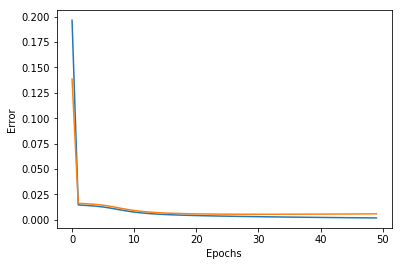

In [56]:
plt.plot(training_errors)
plt.plot(testing_errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

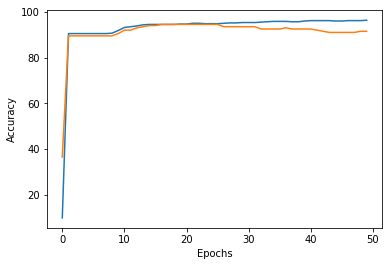

In [57]:
plt.plot(training_accuracies)
plt.plot(testing_accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()